In [3]:
from odt_ai_filters.api import generate_api
import random
from Bio import Seq
import time

def generate_sequence(sequence_length):
    sequence = []
    for _ in range(sequence_length):
        sequence.append(random.choice(["A", "C", "T", "G"]))
    return Seq.Seq("".join(sequence))

    


Time taken with batch size 1: 21.8365261554718 seconds
Time taken with batch size 2: 14.159288167953491 seconds
Time taken with batch size 4: 11.35665512084961 seconds
Time taken with batch size 8: 6.722824335098267 seconds
Time taken with batch size 16: 5.478461742401123 seconds
Time taken with batch size 32: 5.650177001953125 seconds
Time taken with batch size 64: 4.6217100620269775 seconds
Time taken with batch size 128: 4.150490999221802 seconds
Time taken with batch size 256: 4.427234172821045 seconds
Time taken with batch size 512: 6.096526861190796 seconds


Text(0.5, 1.0, 'AI Filters execution time.')

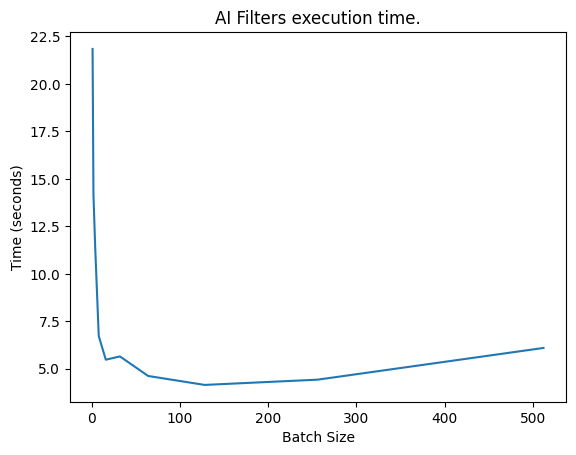

In [6]:
import time
import matplotlib.pyplot as plt

sequences_len = 100
n_sequences = 2000

queries = []
references = []
for _ in range(n_sequences):
    queries.append(generate_sequence(sequences_len))
    references.append(generate_sequence(sequences_len))
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
times = []
for batch_size in batch_sizes:
    start = time.time()
    api = generate_api("hybridization_probability")
    predictions = api.predict(queries, queries, references, references, batch_size)
    times.append(time.time() - start)
    print(f"Time taken with batch size {batch_size}: {time.time() - start} seconds")

plt.plot(batch_sizes, times)
plt.xlabel("Batch Size")
plt.ylabel("Time (seconds)")
plt.title("AI Filters execution time.")
plt.show()

